<a href="https://colab.research.google.com/github/mfza0/Deep_Learning/blob/main/iris_NNmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating Model**

In [96]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [97]:

#create a Model class that inherits nn.Module
class Model(nn.Module):
  #input features (4 features of tje flower)
  #Hidden layer (number of neurons)
  #h2(n) -->
  #output(3 classes of iris flower)
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [98]:

#pick a manual seed for randomization
torch.manual_seed(6)
#create a instance of model
model = Model()

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

**Loading Dataset**

In [100]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [101]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [102]:
#change the last column from strings to numbers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

<ipython-input-102-737baeff6f31>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


In [103]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


**Setting** **and** **splitting** **training and testing data**

In [104]:
#set X and Y , train test split
X = my_df.drop('species',axis=1)
y = my_df['species']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [107]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

In [108]:
#convert y labels to tensor long
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

**Training** **Model**

In [109]:
#set the criterion of model to measure the error, how far off the prediction are from the true value
criterion = nn.CrossEntropyLoss()
#choose adam optimizer, lr = learning rate (if error doesnt go down after a bunch of iterations or epochs)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [110]:
#train our model
#Epochs? (one run thru all the training in our network)
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train) #get predicted results
  loss = criterion(y_pred,y_train) #compare predicted results with true results / error/ loss
  losses.append(loss.detach().numpy()) # keep track of our losses
  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 1.0695171356201172
Epoch: 10 and loss: 0.8462293744087219
Epoch: 20 and loss: 0.6131172776222229
Epoch: 30 and loss: 0.4396083950996399
Epoch: 40 and loss: 0.338224858045578
Epoch: 50 and loss: 0.227679044008255
Epoch: 60 and loss: 0.1479795277118683
Epoch: 70 and loss: 0.10582976788282394
Epoch: 80 and loss: 0.08673819154500961
Epoch: 90 and loss: 0.0773974284529686


Text(0.5, 0, 'Epoch')

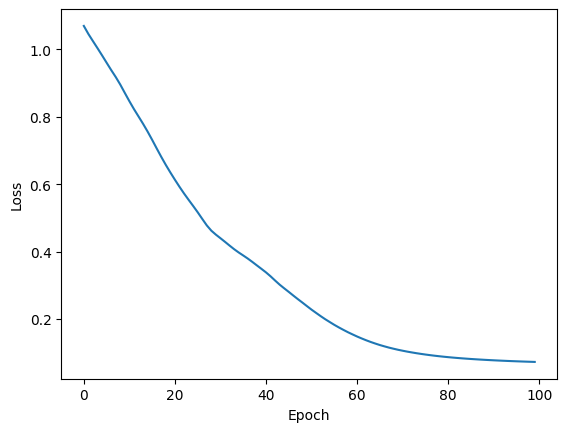

In [111]:
#graph it out:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

**Evaluate** **the** **Model**

In [112]:
#Evalute model on Test Data Set
with torch.no_grad(): #basically turn off backpropagation
 y_eval = model.forward(X_test) #X_test will be the features of test set, y_eval will be the predictions
 loss = criterion(y_eval,y_test) # error/loss
 print(f'Loss on test set: {loss}')



Loss on test set: 0.010907835327088833


In [113]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}. {str(y_val)}  \t  {y_test[i]} \t  {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'We got {correct} correct')
print(f'Accuracy: {round(correct/len(y_test),3)}')

1. tensor([-9.4890,  2.8691, 10.2421])  	  2 	  2
2. tensor([ 10.4195,   5.0287, -14.8781])  	  0 	  0
3. tensor([-0.4016,  5.5379, -2.5259])  	  1 	  1
4. tensor([ 10.0782,   4.6473, -14.2539])  	  0 	  0
5. tensor([-8.1571,  3.3740,  8.2851])  	  2 	  2
6. tensor([-9.0709,  2.6777,  9.9089])  	  2 	  2
7. tensor([-1.1641,  5.2693, -1.4081])  	  1 	  1
8. tensor([ 10.5362,   4.6393, -14.7774])  	  0 	  0
9. tensor([-3.4204,  4.6766,  1.7002])  	  1 	  1
10. tensor([-1.3008,  5.4960, -1.4039])  	  1 	  1
11. tensor([ 0.7486,  4.8272, -3.4748])  	  1 	  1
12. tensor([-2.5193,  5.0101,  0.4071])  	  1 	  1
13. tensor([-2.5381,  4.3059,  0.8037])  	  1 	  1
14. tensor([ 0.1357,  5.1642, -2.9402])  	  1 	  1
15. tensor([-1.3150,  5.0913, -1.1239])  	  1 	  1
16. tensor([-9.0552,  3.5163,  9.2755])  	  2 	  2
17. tensor([-0.3439,  5.3463, -2.4741])  	  1 	  1
18. tensor([-1.9575,  4.9949, -0.2992])  	  1 	  1
19. tensor([ 11.1215,   4.9576, -15.6389])  	  0 	  0
20. tensor([-6.6076,  2.4060

**Making predictions using new data**

In [114]:
new_iris = torch.tensor([5.6,3.7,2.2,1.5])


In [117]:
with torch.no_grad():
  print(model.forward(new_iris))
  iris_pred = model.forward(new_iris).argmax().item()
  if iris_pred == 0:
    print('Setosa')
  elif iris_pred == 1:
    print('Versicolor')
  else:
    print('Virginica')

tensor([  7.1387,   5.5636, -11.5376])
Setosa


**Save our NN Model**

In [118]:
torch.save(model.state_dict(),'iris_model.pt')


In [119]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-119-5cdeecb78af9>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [120]:
#Make sure it loaded correctly
with torch.no_grad():
  print(new_model.forward(new_iris))

tensor([  7.1387,   5.5636, -11.5376])


In [121]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)